In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"/Users/bijnis/Downloads/RTO_Base.csv")

In [4]:
df.head(5)

,Orderid,Sellerid,BuyerID,MobileNumber,RTO_Ratio,Del_Ratio,Buyer_Aging,AppVersion,LastSeen,CODLimit,...,RTO_Hour,Discounted_Order,Expected_Lead_Time,Expected_Lead_Time_5DInt,Expected_Lead_Time_7DInt,Actual_Lead_Time,Del_Status,GMV,Order_Status,Y
0,3116171,1479644696,1490307904,1,0.10,0.89,25,8.1.4,02/09/2022 14:46:15,86000,...,NaN,0,15,3,2,10,On-Time,4045.00,Delivered,0.0
1,3148944,1490410077,1490291198,1,0.19,0.81,25,8.1.0,02/09/2022 17:14:27,68000,...,NaN,0,11,2,2,4,On-Time,1285.55,Delivered,0.0
2,3391764,1490482741,1490291198,1,0.19,0.81,30,8.1.0,02/09/2022 17:14:27,68000,...,NaN,0,15,3,2,6,On-Time,1834.40,Delivered,0.0
3,3257104,1490482138,1490291198,1,0.19,0.81,27,8.1.0,02/09/2022 17:14:27,68000,...,NaN,1,15,3,2,11,On-Time,1680.00,Delivered,0.0
4,4695869,1490459545,1490291198,1,0.19,0.81,42,8.1.0,02/09/2022 17:14:27,68000,...,NaN,1,10,2,1,8,On-Time,5002.08,Delivered,0.0


In [5]:
df.shape

(1511319, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511319 entries, 0 to 1511318
Data columns (total 33 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Orderid                   1511319 non-null  int64  
 1   Sellerid                  1511319 non-null  int64  
 2   BuyerID                   1511319 non-null  int64  
 3   MobileNumber              1511319 non-null  int64  
 4   RTO_Ratio                 1511319 non-null  float64
 5   Del_Ratio                 1511319 non-null  float64
 6   Buyer_Aging               1511319 non-null  int64  
 7   AppVersion                1511134 non-null  object 
 8   LastSeen                  1503490 non-null  object 
 9   CODLimit                  1511319 non-null  int64  
 10  PINCode                   1511319 non-null  int64  
 11  PIN_RTO_Ratio             1511319 non-null  float64
 12  PIN_Del_Ratio             1511319 non-null  float64
 13  DelState                  1

In [7]:
df.isnull().sum()

Orderid                           0
Sellerid                          0
BuyerID                           0
MobileNumber                      0
RTO_Ratio                         0
Del_Ratio                         0
Buyer_Aging                       0
AppVersion                      185
LastSeen                       7829
CODLimit                          0
PINCode                           0
PIN_RTO_Ratio                     0
PIN_Del_Ratio                     0
DelState                          0
OrderMonth                        0
OrderYear                         0
OrderTime                         0
ExpectedDeliveryDate              0
PaymentMode                       0
NDR                               0
NDR_Day                      915401
NDR_Hour                     915401
RTO_Day                     1196112
RTO_Hour                    1196112
Discounted_Order                  0
Expected_Lead_Time                0
Expected_Lead_Time_5DInt          0
Expected_Lead_Time_7DInt    

In [8]:
df[df['Order_Status'].isnull()]

,Orderid,Sellerid,BuyerID,MobileNumber,RTO_Ratio,Del_Ratio,Buyer_Aging,AppVersion,LastSeen,CODLimit,...,RTO_Hour,Discounted_Order,Expected_Lead_Time,Expected_Lead_Time_5DInt,Expected_Lead_Time_7DInt,Actual_Lead_Time,Del_Status,GMV,Order_Status,Y
2880,3540420,1490481535,1490517604,1,0.49,0.48,7,8.1.2,29/08/2022 12:10:43,22000,...,NaN,0,15,3,2,11,On-Time,2913.04,NaN,NaN
3767,3313278,1490347780,1490510384,1,0.37,0.59,3,8.1.4,01/09/2022 12:12:35,22000,...,NaN,0,13,3,2,-18777,On-Time,1190.24,NaN,NaN
3848,3519475,1490481947,1490517604,1,0.49,0.48,7,8.1.2,29/08/2022 12:10:43,22000,...,NaN,0,15,3,2,18,Delay,3073.00,NaN,NaN
4078,3425341,1490479124,1490524308,1,0.44,0.52,6,8.1.3,01/09/2022 22:34:22,23000,...,NaN,0,14,3,2,11,On-Time,4121.00,NaN,NaN
4400,3540415,1490270850,1490517604,1,0.49,0.48,7,8.1.2,29/08/2022 12:10:43,22000,...,NaN,1,12,2,2,-18892,On-Time,4586.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504338,3280209,1490331000,1490293522,1,0.12,0.88,29,8.1.3,27/08/2022 16:23:19,23000,...,NaN,0,12,2,2,-18740,On-Time,2139.20,NaN,NaN
1504545,3714273,1490481302,1490293522,1,0.12,0.88,36,8.1.3,27/08/2022 16:23:19,23000,...,NaN,0,12,2,2,-18946,On-Time,3738.00,NaN,NaN
1507892,4700664,1490481302,1490704961,1,0.10,0.88,8,8.1.0,02/09/2022 13:58:42,42000,...,NaN,0,11,2,2,-19183,On-Time,2150.40,NaN,NaN
1509343,3527662,1490315562,1490507483,1,0.51,0.48,8,8.1.3,02/09/2022 12:27:48,6000,...,NaN,1,12,2,2,-18888,On-Time,6123.16,NaN,NaN


In [9]:
df['Order_Status'].fillna('Lost Order',inplace = True)

In [10]:
df.isnull().sum()*100/df.shape[0]

Orderid                      0.000000
Sellerid                     0.000000
BuyerID                      0.000000
MobileNumber                 0.000000
RTO_Ratio                    0.000000
Del_Ratio                    0.000000
Buyer_Aging                  0.000000
AppVersion                   0.012241
LastSeen                     0.518024
CODLimit                     0.000000
PINCode                      0.000000
PIN_RTO_Ratio                0.000000
PIN_Del_Ratio                0.000000
DelState                     0.000000
OrderMonth                   0.000000
OrderYear                    0.000000
OrderTime                    0.000000
ExpectedDeliveryDate         0.000000
PaymentMode                  0.000000
NDR                          0.000000
NDR_Day                     60.569675
NDR_Hour                    60.569675
RTO_Day                     79.143583
RTO_Hour                    79.143583
Discounted_Order             0.000000
Expected_Lead_Time           0.000000
Expected_Lea

In [11]:
df['Del_Status'].value_counts()

On-Time    1300313
Delay       211006
Name: Del_Status, dtype: int64

In [12]:
#sns.distplot(df['GMV'])

In [13]:
df.corr()

,Orderid,Sellerid,BuyerID,MobileNumber,RTO_Ratio,Del_Ratio,Buyer_Aging,CODLimit,PINCode,PIN_RTO_Ratio,...,NDR,NDR_Hour,RTO_Hour,Discounted_Order,Expected_Lead_Time,Expected_Lead_Time_5DInt,Expected_Lead_Time_7DInt,Actual_Lead_Time,GMV,Y
Orderid,1.000000,0.067295,0.127255,NaN,0.028041,-0.062892,0.020822,0.014045,0.048634,0.067014,...,0.028529,0.254814,-0.218464,0.062246,-0.293282,-0.273367,-0.215243,0.004113,0.020550,0.053194
Sellerid,0.067295,1.000000,0.029075,NaN,0.026924,-0.027605,-0.046640,-0.021800,-0.003749,0.024427,...,-0.000402,0.013679,-0.009389,-0.012494,-0.079891,-0.062280,-0.065972,-0.002255,-0.041018,0.014818
BuyerID,0.127255,0.029075,1.000000,NaN,0.059559,-0.075101,-0.343633,-0.049494,0.033164,0.077334,...,0.017567,0.031675,-0.031782,-0.013901,-0.041907,-0.039451,-0.040414,-0.001044,-0.064366,0.045521
MobileNumber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RTO_Ratio,0.028041,0.026924,0.059559,NaN,1.000000,-0.980392,-0.139271,-0.214584,-0.036829,0.408388,...,0.369452,0.000185,-0.001079,-0.063098,-0.062743,-0.056164,-0.048321,0.000949,-0.089901,0.582073
Del_Ratio,-0.062892,-0.027605,-0.075101,NaN,-0.980392,1.000000,0.155667,0.202347,0.018218,-0.408472,...,-0.369774,-0.008632,0.009287,0.058364,0.060979,0.055282,0.048381,0.007964,0.086054,-0.578634
Buyer_Aging,0.020822,-0.046640,-0.343633,NaN,-0.139271,0.155667,1.000000,0.193844,0.005406,-0.173748,...,-0.017603,0.008054,-0.007072,0.050874,0.028911,0.020320,0.044388,0.004033,0.154129,-0.085600
CODLimit,0.014045,-0.021800,-0.049494,NaN,-0.214584,0.202347,0.193844,1.000000,0.052537,-0.214166,...,-0.090010,0.002005,0.005019,0.083439,0.107985,0.092710,0.079668,0.001352,0.184551,-0.133062
PINCode,0.048634,-0.003749,0.033164,NaN,-0.036829,0.018218,0.005406,0.052537,1.000000,-0.005164,...,-0.000421,0.006034,-0.038250,0.009173,0.323072,0.294917,0.210278,0.002426,0.042280,-0.014078
PIN_RTO_Ratio,0.067014,0.024427,0.077334,NaN,0.408388,-0.408472,-0.173748,-0.214166,-0.005164,1.000000,...,0.202776,0.014287,-0.000761,-0.034153,-0.077376,-0.073827,-0.064161,-0.002360,-0.073831,0.269489


In [14]:
df.describe(include = 'all')

,Orderid,Sellerid,BuyerID,MobileNumber,RTO_Ratio,Del_Ratio,Buyer_Aging,AppVersion,LastSeen,CODLimit,...,RTO_Hour,Discounted_Order,Expected_Lead_Time,Expected_Lead_Time_5DInt,Expected_Lead_Time_7DInt,Actual_Lead_Time,Del_Status,GMV,Order_Status,Y
count,1.511319e+06,1.511319e+06,1.511319e+06,1511319.0,1.511319e+06,1.511319e+06,1.511319e+06,1511134,1503490,1.511319e+06,...,315207.000000,1.511319e+06,1.511319e+06,1.511319e+06,1.511319e+06,1.511319e+06,1511319,1.511319e+06,1511319,1.510475e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,172481,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.1.0,02/09/2022 19:26:52,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,On-Time,NaN,Delivered,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253186,1727,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1300313,NaN,1195268,NaN
mean,3.907146e+06,1.489878e+09,1.490511e+09,1.0,2.683790e-01,7.148773e-01,1.002126e+01,NaN,NaN,3.423369e+04,...,13.942327,2.006195e-01,1.258962e+01,2.497389e+00,1.815056e+00,1.951069e+00,NaN,3.022382e+03,NaN,2.086807e-01
std,5.078556e+05,2.378916e+06,8.815874e+05,0.0,2.400879e-01,2.402173e-01,1.126517e+01,NaN,NaN,4.770130e+04,...,4.743204,4.004640e-01,2.454167e+00,5.586396e-01,4.304790e-01,3.547923e+02,NaN,2.989045e+03,NaN,4.063658e-01
min,3.027278e+06,1.476625e+09,1.479642e+09,1.0,0.000000e+00,0.000000e+00,-3.000000e+00,NaN,NaN,0.000000e+00,...,0.000000,0.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,-1.920400e+04,NaN,1.704600e+02,NaN,0.000000e+00
25%,3.469021e+06,1.490335e+09,1.490411e+09,1.0,1.000000e-01,6.000000e-01,1.000000e+00,NaN,NaN,2.200000e+04,...,10.000000,0.000000e+00,1.100000e+01,2.000000e+00,2.000000e+00,6.000000e+00,NaN,1.612800e+03,NaN,0.000000e+00
50%,3.907144e+06,1.490479e+09,1.490536e+09,1.0,2.000000e-01,7.800000e-01,5.000000e+00,NaN,NaN,2.300000e+04,...,13.000000,0.000000e+00,1.200000e+01,2.000000e+00,2.000000e+00,8.000000e+00,NaN,2.205000e+03,NaN,0.000000e+00
75%,4.344890e+06,1.490483e+09,1.490726e+09,1.0,3.800000e-01,8.900000e-01,1.700000e+01,NaN,NaN,2.600000e+04,...,18.000000,0.000000e+00,1.400000e+01,3.000000e+00,2.000000e+00,1.000000e+01,NaN,3.353920e+03,NaN,0.000000e+00


In [15]:
df.columns

Index(['Orderid', 'Sellerid', 'BuyerID', 'MobileNumber', 'RTO_Ratio',
       'Del_Ratio', 'Buyer_Aging', 'AppVersion', 'LastSeen', 'CODLimit',
       'PINCode', 'PIN_RTO_Ratio', 'PIN_Del_Ratio', 'DelState', 'OrderMonth',
       'OrderYear', 'OrderTime', 'ExpectedDeliveryDate', 'PaymentMode', 'NDR',
       'NDR_Day', 'NDR_Hour', 'RTO_Day', 'RTO_Hour', 'Discounted_Order',
       'Expected_Lead_Time', 'Expected_Lead_Time_5DInt',
       'Expected_Lead_Time_7DInt', 'Actual_Lead_Time', 'Del_Status', 'GMV',
       'Order_Status', 'Y'],
      dtype='object')

In [16]:
df['Order_Status'].value_counts()

Delivered     1195268
RTO            315207
Lost Order        844
Name: Order_Status, dtype: int64

In [17]:
df = df[df['Order_Status'] != 'Lost Order']

In [18]:
df.shape

(1510475, 33)

In [19]:
df.columns

Index(['Orderid', 'Sellerid', 'BuyerID', 'MobileNumber', 'RTO_Ratio',
       'Del_Ratio', 'Buyer_Aging', 'AppVersion', 'LastSeen', 'CODLimit',
       'PINCode', 'PIN_RTO_Ratio', 'PIN_Del_Ratio', 'DelState', 'OrderMonth',
       'OrderYear', 'OrderTime', 'ExpectedDeliveryDate', 'PaymentMode', 'NDR',
       'NDR_Day', 'NDR_Hour', 'RTO_Day', 'RTO_Hour', 'Discounted_Order',
       'Expected_Lead_Time', 'Expected_Lead_Time_5DInt',
       'Expected_Lead_Time_7DInt', 'Actual_Lead_Time', 'Del_Status', 'GMV',
       'Order_Status', 'Y'],
      dtype='object')

In [20]:
df['PaymentMode'].value_counts()

COD       1376131
Online     133649
Wallet        695
Name: PaymentMode, dtype: int64

In [21]:
#sns.barplot(x ='Del_Status', y= 'GMV', hue ='Order_Status'  ,data = df )

In [22]:
#sns.barplot(x ='Discounted_Order', y= 'GMV', hue ='Order_Status'  ,data = df )

In [23]:
#sns.countplot(x ='Discounted_Order', hue ='Order_Status'  ,data = df )

In [24]:
#sns.barplot(x ='PaymentMode', y= 'GMV', hue ='Order_Status'  ,data = df )

In [25]:
#sns.countplot(x ='PaymentMode', hue ='Order_Status'  ,data = df )

In [26]:
#sns.barplot(x ='Del_Status', y= 'GMV', hue ='Order_Status'  ,data = df )

In [27]:
#sns.countplot(x ='Del_Status', hue ='Order_Status'  ,data = df )

In [28]:
#sns.barplot(x ='AppVersion', y= 'GMV', hue ='Order_Status',orient = "v"  ,data = df )

In [29]:
#sns.countplot(y ='OrderMonth', hue ='Order_Status',orient = "h",data = df )

In [30]:
#sns.distplot(df['Buyer_Aging'])

In [31]:
df['Delay'] = df['Expected_Lead_Time'] - df['Actual_Lead_Time']
dfBAR = df[df['Order_Status']== 'RTO']
dfBAD = df[df['Order_Status']== 'Delivered']

In [32]:
#sns.distplot(dfBAR['Buyer_Aging'])

In [33]:
#sns.distplot(dfBAR['Delay'])

In [34]:
#sns.distplot(dfBAR['CODLimit'])

In [35]:
#sns.boxplot(dfBAR['GMV'])

In [36]:
#sns.distplot(dfBAD['Buyer_Aging'])

In [37]:
#sns.distplot(dfBAD['Delay'])

In [38]:
#sns.distplot(dfBAD['CODLimit'])

In [39]:
df.columns

Index(['Orderid', 'Sellerid', 'BuyerID', 'MobileNumber', 'RTO_Ratio',
       'Del_Ratio', 'Buyer_Aging', 'AppVersion', 'LastSeen', 'CODLimit',
       'PINCode', 'PIN_RTO_Ratio', 'PIN_Del_Ratio', 'DelState', 'OrderMonth',
       'OrderYear', 'OrderTime', 'ExpectedDeliveryDate', 'PaymentMode', 'NDR',
       'NDR_Day', 'NDR_Hour', 'RTO_Day', 'RTO_Hour', 'Discounted_Order',
       'Expected_Lead_Time', 'Expected_Lead_Time_5DInt',
       'Expected_Lead_Time_7DInt', 'Actual_Lead_Time', 'Del_Status', 'GMV',
       'Order_Status', 'Y', 'Delay'],
      dtype='object')

In [40]:
#sns.boxplot(x='Order_Status', y = 'Expected_Lead_Time',hue = 'Order_Status',data = df)

In [41]:
#sns.boxplot(x='Discounted_Order', y = 'Expected_Lead_Time',hue = 'Order_Status',data = df)

In [42]:
#sns.boxplot(x='Order_Status', y = 'Expected_Lead_Time',data = df)

In [43]:
#sns.boxplot(x='PaymentMode', y = 'Expected_Lead_Time',hue = 'Order_Status',data = df)

In [44]:
#sns.boxplot(x='Order_Status', y = 'GMV',data = df)

In [45]:
#sns.boxplot(x='Order_Status', y = 'Buyer_Aging',data = df)

In [46]:
#sns.boxplot(x='Order_Status', y = 'CODLimit',data = df)

In [47]:
#sns.boxplot(x='Order_Status', y = 'OrderTime',hue = 'OrderYear',data = df)

In [48]:
#sns.boxplot(x='Order_Status', y = 'GMV',hue = 'DelState',data = df)

In [49]:
#sns.countplot(y='DelState',hue = 'Order_Status',data = df)

In [50]:
dfBAD['CODLimit'].value_counts()

22000     351593
23000     153944
21000     105362
24000      91815
25000      57749
           ...  
227000        12
189000        11
761000        11
8000           4
341000         1
Name: CODLimit, Length: 266, dtype: int64

In [51]:
dfBAR['CODLimit'].value_counts()

22000     88154
10000     40575
23000     34267
21000     33306
24000     19081
          ...  
177000        1
282000        1
136000        1
180000        1
143000        1
Name: CODLimit, Length: 230, dtype: int64

In [52]:
dfBAD['CODLimit'].max()

947000

In [53]:
dfBAR['CODLimit'].max()

947000

In [54]:
#sns.distplot(dfBAD['OrderTime'])

In [55]:
#sns.distplot(dfBAR['OrderTime'])

In [56]:
coddf = df[df['PaymentMode'] == 'COD']

In [57]:
coddf.corr()

,Orderid,Sellerid,BuyerID,MobileNumber,RTO_Ratio,Del_Ratio,Buyer_Aging,CODLimit,PINCode,PIN_RTO_Ratio,...,NDR_Hour,RTO_Hour,Discounted_Order,Expected_Lead_Time,Expected_Lead_Time_5DInt,Expected_Lead_Time_7DInt,Actual_Lead_Time,GMV,Y,Delay
Orderid,1.000000,0.070453,0.138563,NaN,0.033128,-0.067443,0.004781,-0.003295,0.046851,0.071482,...,0.254205,-0.217566,0.032828,-0.289606,-0.270566,-0.213537,-0.063000,0.005561,0.057720,-0.105586
Sellerid,0.070453,1.000000,0.029710,NaN,0.026047,-0.026572,-0.047054,-0.018512,-0.004423,0.023644,...,0.014219,-0.009132,-0.010467,-0.081170,-0.063483,-0.066603,-0.055734,-0.045334,0.013674,0.009251
BuyerID,0.138563,0.029710,1.000000,NaN,0.056895,-0.072056,-0.351468,-0.044348,0.025754,0.075394,...,0.032673,-0.032259,-0.004202,-0.048813,-0.043807,-0.044630,-0.038519,-0.063550,0.042530,0.010666
MobileNumber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RTO_Ratio,0.033128,0.026047,0.056895,NaN,1.000000,-0.981000,-0.141951,-0.218328,-0.053741,0.405932,...,0.001494,-0.001249,-0.031604,-0.072423,-0.064489,-0.054850,0.019510,-0.080336,0.578470,-0.062380
Del_Ratio,-0.067443,-0.026572,-0.072056,NaN,-0.981000,1.000000,0.157145,0.203769,0.035424,-0.405665,...,-0.009945,0.009394,0.027065,0.070414,0.063433,0.054779,-0.027480,0.076809,-0.575283,0.069333
Buyer_Aging,0.004781,-0.047054,-0.351468,NaN,-0.141951,0.157145,1.000000,0.177372,0.011997,-0.169945,...,0.006673,-0.006695,0.022802,0.040012,0.030158,0.051732,0.075889,0.161654,-0.080796,-0.053952
CODLimit,-0.003295,-0.018512,-0.044348,NaN,-0.218328,0.203769,0.177372,1.000000,0.064868,-0.210936,...,-0.000411,0.004889,0.051758,0.133087,0.114846,0.095709,0.081646,0.176684,-0.136620,-0.005235
PINCode,0.046851,-0.004423,0.025754,NaN,-0.053741,0.035424,0.011997,0.064868,1.000000,-0.015781,...,0.006673,-0.037700,0.017965,0.322619,0.294940,0.209660,0.194538,0.062725,-0.026172,-0.009241
PIN_RTO_Ratio,0.071482,0.023644,0.075394,NaN,0.405932,-0.405665,-0.169945,-0.210936,-0.015781,1.000000,...,0.015259,-0.000615,-0.013611,-0.081611,-0.077521,-0.066398,-0.020251,-0.072196,0.266606,-0.027207


In [58]:
df.columns

Index(['Orderid', 'Sellerid', 'BuyerID', 'MobileNumber', 'RTO_Ratio',
       'Del_Ratio', 'Buyer_Aging', 'AppVersion', 'LastSeen', 'CODLimit',
       'PINCode', 'PIN_RTO_Ratio', 'PIN_Del_Ratio', 'DelState', 'OrderMonth',
       'OrderYear', 'OrderTime', 'ExpectedDeliveryDate', 'PaymentMode', 'NDR',
       'NDR_Day', 'NDR_Hour', 'RTO_Day', 'RTO_Hour', 'Discounted_Order',
       'Expected_Lead_Time', 'Expected_Lead_Time_5DInt',
       'Expected_Lead_Time_7DInt', 'Actual_Lead_Time', 'Del_Status', 'GMV',
       'Order_Status', 'Y', 'Delay'],
      dtype='object')

In [59]:
#sns.boxplot(x='Order_Status', y = 'RTO_Hour',hue = 'RTO_Day',data = coddf)

In [60]:
#sns.boxplot(x='Order_Status', y = 'RTO_Hour',hue = 'RTO_Day',data = df)

In [61]:
#sns.boxplot(x='Order_Status', y = 'NDR_Hour',hue = 'NDR_Day',data = df)

In [62]:
#sns.boxplot(x='Order_Status', y = 'NDR_Hour',hue = 'NDR_Day',data = coddf)

In [63]:
#sns.scatterplot(x = 'Delay', y = 'GMV', hue = 'Order_Status', data = df)

In [64]:
#sns.scatterplot(x = 'Buyer_Aging', y = 'GMV', hue = 'Order_Status', data = df)

In [65]:
df['Buyer_Cat'] = df['Buyer_Aging'].map(lambda x: 1 if x > 4 else 2)
df['Delay_Cat'] = df['Delay'].map(lambda x: 1 if x < 0 else 0)

In [66]:
#sns.scatterplot(x = 'Buyer_Cat', y = 'GMV', hue = 'Order_Status', data = df)

In [67]:
df.corr().to_csv(r"C:\Users\Bijnis\Desktop\RTO_Variables_Correlation.csv")

In [68]:
df.corr()

,Orderid,Sellerid,BuyerID,MobileNumber,RTO_Ratio,Del_Ratio,Buyer_Aging,CODLimit,PINCode,PIN_RTO_Ratio,...,Discounted_Order,Expected_Lead_Time,Expected_Lead_Time_5DInt,Expected_Lead_Time_7DInt,Actual_Lead_Time,GMV,Y,Delay,Buyer_Cat,Delay_Cat
Orderid,1.000000,0.067319,0.127232,NaN,0.028059,-0.062867,0.020823,0.014020,0.048650,0.067046,...,0.062285,-0.293510,-0.273561,-0.215397,-0.063490,0.020559,0.053194,-0.108813,0.031502,0.059618
Sellerid,0.067319,1.000000,0.029093,NaN,0.026926,-0.027575,-0.046654,-0.021790,-0.003735,0.024395,...,-0.012493,-0.079876,-0.062254,-0.065935,-0.053243,-0.041019,0.014818,0.007139,0.048002,-0.011080
BuyerID,0.127232,0.029093,1.000000,NaN,0.059569,-0.075064,-0.343619,-0.049509,0.033173,0.077319,...,-0.013936,-0.041891,-0.039450,-0.040405,-0.031554,-0.064361,0.045521,0.007454,0.213239,-0.006128
MobileNumber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RTO_Ratio,0.028059,0.026926,0.059569,NaN,1.000000,-0.980605,-0.139285,-0.214603,-0.036857,0.408426,...,-0.063135,-0.062731,-0.056152,-0.048304,0.027166,-0.089893,0.582073,-0.064882,0.154974,0.048225
Del_Ratio,-0.062867,-0.027575,-0.075064,NaN,-0.980605,1.000000,0.155540,0.202315,0.018184,-0.408452,...,0.058425,0.060940,0.055263,0.048344,-0.035224,0.086004,-0.578634,0.072056,-0.166989,-0.053377
Buyer_Aging,0.020823,-0.046654,-0.343619,NaN,-0.139285,0.155540,1.000000,0.193857,0.005381,-0.173718,...,0.050917,0.028814,0.020247,0.044325,0.067034,0.154107,-0.085600,-0.051448,-0.739241,0.036446
CODLimit,0.014020,-0.021790,-0.049509,NaN,-0.214603,0.202315,0.193857,1.000000,0.052516,-0.214160,...,0.083472,0.107903,0.092631,0.079593,0.067098,0.184532,-0.133062,-0.004712,-0.166608,0.007863
PINCode,0.048650,-0.003735,0.033173,NaN,-0.036857,0.018184,0.005381,0.052516,1.000000,-0.005150,...,0.009177,0.323074,0.294900,0.210215,0.199475,0.042267,-0.014078,-0.012650,-0.039115,0.037060
PIN_RTO_Ratio,0.067046,0.024395,0.077319,NaN,0.408426,-0.408452,-0.173718,-0.214160,-0.005150,1.000000,...,-0.034197,-0.077306,-0.073770,-0.064105,-0.015159,-0.073815,0.269489,-0.030257,0.171234,0.026131


In [69]:
#sns.distplot(df['RTO_Hour'])

In [70]:
#sns.distplot(df['NDR_Hour'])

In [71]:
df.columns

Index(['Orderid', 'Sellerid', 'BuyerID', 'MobileNumber', 'RTO_Ratio',
       'Del_Ratio', 'Buyer_Aging', 'AppVersion', 'LastSeen', 'CODLimit',
       'PINCode', 'PIN_RTO_Ratio', 'PIN_Del_Ratio', 'DelState', 'OrderMonth',
       'OrderYear', 'OrderTime', 'ExpectedDeliveryDate', 'PaymentMode', 'NDR',
       'NDR_Day', 'NDR_Hour', 'RTO_Day', 'RTO_Hour', 'Discounted_Order',
       'Expected_Lead_Time', 'Expected_Lead_Time_5DInt',
       'Expected_Lead_Time_7DInt', 'Actual_Lead_Time', 'Del_Status', 'GMV',
       'Order_Status', 'Y', 'Delay', 'Buyer_Cat', 'Delay_Cat'],
      dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1510475 entries, 0 to 1511318
Data columns (total 36 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Orderid                   1510475 non-null  int64  
 1   Sellerid                  1510475 non-null  int64  
 2   BuyerID                   1510475 non-null  int64  
 3   MobileNumber              1510475 non-null  int64  
 4   RTO_Ratio                 1510475 non-null  float64
 5   Del_Ratio                 1510475 non-null  float64
 6   Buyer_Aging               1510475 non-null  int64  
 7   AppVersion                1510291 non-null  object 
 8   LastSeen                  1502651 non-null  object 
 9   CODLimit                  1510475 non-null  int64  
 10  PINCode                   1510475 non-null  int64  
 11  PIN_RTO_Ratio             1510475 non-null  float64
 12  PIN_Del_Ratio             1510475 non-null  float64
 13  DelState                  1

In [73]:
# selected Variables
dff = df[['BuyerID','RTO_Ratio','Del_Ratio','Buyer_Aging','CODLimit','PINCode','PIN_RTO_Ratio', 'PIN_Del_Ratio','PaymentMode','NDR','Discounted_Order','GMV','Buyer_Cat','Delay_Cat','Y']]

In [74]:
# conda install -c conda-forge imbalanced-learn

In [75]:
dff.head()

,BuyerID,RTO_Ratio,Del_Ratio,Buyer_Aging,CODLimit,PINCode,PIN_RTO_Ratio,PIN_Del_Ratio,PaymentMode,NDR,Discounted_Order,GMV,Buyer_Cat,Delay_Cat,Y
0,1490307904,0.10,0.89,25,86000,600053,0.10,0.79,COD,0,0,4045.00,1,0,0.0
1,1490291198,0.19,0.81,25,68000,803101,0.17,0.77,COD,0,0,1285.55,1,0,0.0
2,1490291198,0.19,0.81,30,68000,803101,0.17,0.77,COD,1,0,1834.40,1,0,0.0
3,1490291198,0.19,0.81,27,68000,803101,0.17,0.77,COD,1,1,1680.00,1,0,0.0
4,1490291198,0.19,0.81,42,68000,803101,0.17,0.77,COD,0,1,5002.08,1,0,0.0


In [76]:
df.PaymentMode.unique()

array(['COD', 'Online', 'Wallet'], dtype=object)

In [77]:
dff['PaymentMode'] = dff.PaymentMode.map({'Online':2,'COD':3,'Wallet':1})

/var/folders/2d/cfk1zt4s35v5dzb8gbkgl3b00000gn/T/ipykernel_45682/4089339565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['PaymentMode'] = dff.PaymentMode.map({'Online':2,'COD':3,'Wallet':1})


In [78]:
dff.head()

,BuyerID,RTO_Ratio,Del_Ratio,Buyer_Aging,CODLimit,PINCode,PIN_RTO_Ratio,PIN_Del_Ratio,PaymentMode,NDR,Discounted_Order,GMV,Buyer_Cat,Delay_Cat,Y
0,1490307904,0.10,0.89,25,86000,600053,0.10,0.79,3,0,0,4045.00,1,0,0.0
1,1490291198,0.19,0.81,25,68000,803101,0.17,0.77,3,0,0,1285.55,1,0,0.0
2,1490291198,0.19,0.81,30,68000,803101,0.17,0.77,3,1,0,1834.40,1,0,0.0
3,1490291198,0.19,0.81,27,68000,803101,0.17,0.77,3,1,1,1680.00,1,0,0.0
4,1490291198,0.19,0.81,42,68000,803101,0.17,0.77,3,0,1,5002.08,1,0,0.0


In [136]:
dff = dff[['BuyerID', 'RTO_Ratio', 'Del_Ratio', 'Buyer_Aging', 'CODLimit',
       'PINCode', 'PIN_RTO_Ratio', 'PIN_Del_Ratio', 'PaymentMode',
       'Discounted_Order', 'GMV', 'Buyer_Cat', 'Delay_Cat', 'Y']]

In [137]:
dff.head()

,BuyerID,RTO_Ratio,Del_Ratio,Buyer_Aging,CODLimit,PINCode,PIN_RTO_Ratio,PIN_Del_Ratio,PaymentMode,Discounted_Order,GMV,Buyer_Cat,Delay_Cat,Y
0,1490307904,0.10,0.89,25,86000,600053,0.10,0.79,3,0,4045.00,1,0,0.0
1,1490291198,0.19,0.81,25,68000,803101,0.17,0.77,3,0,1285.55,1,0,0.0
2,1490291198,0.19,0.81,30,68000,803101,0.17,0.77,3,0,1834.40,1,0,0.0
3,1490291198,0.19,0.81,27,68000,803101,0.17,0.77,3,1,1680.00,1,0,0.0
4,1490291198,0.19,0.81,42,68000,803101,0.17,0.77,3,1,5002.08,1,0,0.0


In [138]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [139]:
# splitting dataframe
df_train,df_test = train_test_split(dff,train_size=0.7,test_size=0.3,random_state=100)

In [140]:
train_data = df_train.copy()
test_data = df_test.copy()

In [141]:
print('Train Shape ',df_train.shape)
print('Test Shape ',df_test.shape)

Train Shape  (1057332, 14)
Test Shape  (453143, 14)


In [142]:
print('Training Data -',df_train.Y.value_counts()/len(df_train))
print('Test Data -',df_test.Y.value_counts()/len(df_test))

Training Data - 0.0    0.791232
1.0    0.208768
Name: Y, dtype: float64
Test Data - 0.0    0.791523
1.0    0.208477
Name: Y, dtype: float64


In [143]:
scaling_cols = ['Buyer_Aging','CODLimit','PINCode','GMV']

In [144]:
# scaling features
minmax = MinMaxScaler()
df_train[scaling_cols] = minmax.fit_transform(df_train[scaling_cols])
df_test[scaling_cols] = minmax.transform(df_test[scaling_cols])

In [145]:
!pip install imbalanced-learn

In [146]:
from imblearn.over_sampling import SMOTE

In [147]:
# Splitting in dependent and features
y_train = df_train.pop('Y')
X_train = df_train
y_test = df_test.pop('Y')
X_test = df_test

In [148]:
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train,y_train) 

In [149]:
y_train_sm.value_counts()

1.0    836595
0.0    836595
Name: Y, dtype: int64

In [150]:
X_train_sm.head()

,BuyerID,RTO_Ratio,Del_Ratio,Buyer_Aging,CODLimit,PINCode,PIN_RTO_Ratio,PIN_Del_Ratio,PaymentMode,Discounted_Order,GMV,Buyer_Cat,Delay_Cat
0,1490493222,0.35,0.65,0.197368,0.030623,0.833727,0.24,0.59,3,0,0.016830,1,0
1,1490765504,0.21,0.64,0.065789,0.024287,0.967636,0.18,0.45,3,0,0.003432,2,0
2,1490578306,0.06,0.89,0.052632,0.024287,0.604066,0.19,0.75,2,0,0.002562,2,0
3,1490495991,0.75,0.25,0.052632,0.023231,0.847166,0.26,0.60,3,0,0.004682,2,0
4,1490972200,0.33,0.67,0.052632,0.027455,0.150582,0.16,0.74,3,0,0.014003,2,0


In [151]:
# # Importing random forest classifier from sklearn library
# from sklearn.ensemble import RandomForestClassifier

# # Running the random forest with default parameters.
# rfc = RandomForestClassifier()

In [107]:
# # fit
# rfc.fit(X_train_sm,y_train_sm)

In [108]:
# # Making predictions
# predictions = rfc.predict(X_test)

# # Importing classification report and confusion matrix from sklearn metrics
# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# # Let's check the report of our default model
# print(classification_report(y_test,predictions))

# # Printing confusion matrix
# print(confusion_matrix(y_test,predictions))

In [109]:
# print(accuracy_score(y_test,predictions))

In [110]:
# rfc.predict_proba(X_test)

In [111]:
# # GridSearchCV to find optimal n_estimators
# from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV


# # specify number of folds for k-fold CV
# n_folds = 5

# # parameters to build the model on
# parameters = {'max_depth': range(2, 20, 5)}

# # instantiate the model
# rf = RandomForestClassifier()


# # fit tree on training data
# rf = GridSearchCV(rf, parameters, 
#                     cv=n_folds, 
#                    scoring="accuracy")
# rf.fit(X_train_sm, y_train_sm)

In [112]:
# # scores of GridSearch CV
# scores = rf.cv_results_
# pd.DataFrame(scores).head()

In [113]:
# # GridSearchCV to find optimal n_estimators
# from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV


# # specify number of folds for k-fold CV
# n_folds = 5

# # parameters to build the model on
# parameters = {'n_estimators': range(100, 1500, 400)}

# # instantiate the model (note we are specifying a max_depth)
# rf = RandomForestClassifier(max_depth=4)


# # fit tree on training data
# rf = GridSearchCV(rf, parameters, 
#                     cv=n_folds, 
#                    scoring="accuracy")
# rf.fit(X_train_sm, y_train_sm)

In [114]:
# # scores of GridSearch CV
# scores = rf.cv_results_
# pd.DataFrame(scores).head()

In [115]:
# # GridSearchCV to find optimal max_features
# from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV


# # specify number of folds for k-fold CV
# n_folds = 5

# # parameters to build the model on
# parameters = {'max_features': [2, 3, 4, 5, 6,7,8,9,10]}

# # instantiate the model
# rf = RandomForestClassifier(max_depth=7)


# # fit tree on training data
# rf = GridSearchCV(rf, parameters, 
#                     cv=n_folds, 
#                    scoring="accuracy")
# rf.fit(X_train_sm, y_train_sm)

In [116]:
# # scores of GridSearch CV
# scores = rf.cv_results_
# pd.DataFrame(scores)

In [117]:
# # GridSearchCV to find optimal min_samples_leaf
# from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV


# # specify number of folds for k-fold CV
# n_folds = 5

# # parameters to build the model on
# parameters = {'min_samples_leaf': range(100, 400, 50)}

# # instantiate the model
# rf = RandomForestClassifier()


# # fit tree on training data
# rf = GridSearchCV(rf, parameters, 
#                     cv=n_folds, 
#                    scoring="accuracy")
# rf.fit(X_train_sm, y_train_sm)

In [118]:
# # scores of GridSearch CV
# scores = rf.cv_results_
# pd.DataFrame(scores).head()

In [119]:
# # GridSearchCV to find optimal min_samples_split
# from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV


# # specify number of folds for k-fold CV
# n_folds = 5

# # parameters to build the model on
# parameters = {'min_samples_split': range(200, 500, 50)}

# # instantiate the model
# rf = RandomForestClassifier()


# # fit tree on training data
# rf = GridSearchCV(rf, parameters, 
#                     cv=n_folds, 
#                    scoring="accuracy")
# rf.fit(X_train_sm, y_train_sm)

In [120]:
# # scores of GridSearch CV
# scores = rf.cv_results_
# pd.DataFrame(scores).head()

In [121]:
# # printing the optimal accuracy score and hyperparameters
# print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [122]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=100)

In [123]:
# fit
rfc.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=7, max_features=5, min_samples_leaf=100,
                       min_samples_split=200)

# Setup the pipeline for live data basis on the above training data

## Run rest of the code

In [124]:
test_df = pd.read_excel(r"C:\Users\Bijnis\Downloads\RTO_Base_AUG_Final.xlsx") #-- use this line of code to fetch new data
#test_df['Order_Status'].fillna('Lost Order',inplace = True)
#test_df = test_df[test_df['Order_Status'] != 'Lost Order']
test_df['Delay'] = 0
test_df['Buyer_Cat'] = test_df['Buyer_Aging'].map(lambda x: 1 if x > 4 else 2)
test_df['Delay_Cat'] = test_df['Delay'].map(lambda x: 1 if x < 0 else 0)
test_df['PaymentMode'] = test_df.PaymentMode.map({'Online':2,'COD':3,'Wallet':1})

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Bijnis\\Downloads\\RTO_Base_AUG_Final.xlsx'

In [ ]:
test_df.head()

In [ ]:
final = test_df[[ 'BuyerID','RTO_Ratio', 'Del_Ratio', 'Buyer_Aging', 'CODLimit',
       'PINCode', 'PIN_RTO_Ratio', 'PIN_Del_Ratio', 'PaymentMode',
       'Discounted_Order', 'GMV', 'Buyer_Cat','Delay_Cat']]

In [ ]:
final.head()

In [ ]:
#test_df.Y.value_counts()

In [ ]:
final.head()

In [ ]:
# selected Variables
dfftest = final[['RTO_Ratio','Del_Ratio','Buyer_Aging','CODLimit','PINCode','PIN_RTO_Ratio', 'PIN_Del_Ratio','PaymentMode','Discounted_Order','GMV','Buyer_Cat','Delay_Cat']]

dfftest[scaling_cols] = minmax.transform(dfftest[scaling_cols])
X_test_aug = dfftest

In [ ]:
# # selected Variables
# dfftest = test_df[['BuyerID','RTO_Ratio','Del_Ratio','Buyer_Aging','CODLimit','PINCode','PIN_RTO_Ratio', 'PIN_Del_Ratio','PaymentMode','NDR','Discounted_Order','GMV','Buyer_Cat','Delay_Cat','Y']]

# dfftest[scaling_cols] = minmax.transform(dfftest[scaling_cols])
# y_test_aug = dfftest.pop('Y')
# X_test_aug = dfftest

In [ ]:
X_test_aug

In [170]:
# Making predictions
predictions_Aug = rfc.predict(X_test_aug)

ValueError: X has 12 features, but DecisionTreeClassifier is expecting 13 features as input.

In [171]:
# Making predictions
predictions_nobuyer = rfc.predict(X_test)

In [172]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Let's check the report of our default model
print(classification_report(y_test,predictions_nobuyer))

              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85    358673
         1.0       0.48      0.76      0.59     94470

    accuracy                           0.78    453143
   macro avg       0.70      0.77      0.72    453143
weighted avg       0.83      0.78      0.80    453143



In [173]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions_nobuyer))

[[282208  76465]
 [ 23026  71444]]


In [174]:
print(accuracy_score(y_test,predictions_nobuyer))

0.7804423769097173


In [103]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Let's check the report of our default model
print(classification_report(y_test_aug,predictions_Aug))

NameError: name 'y_test_aug' is not defined

In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_test_aug,predictions_Aug))

In [104]:
rfc.feature_importances_

array([1.32405981e-03, 5.16120089e-01, 3.15760849e-01, 3.71740925e-02,
       6.07893342e-02, 3.85360822e-04, 2.98821579e-02, 9.22806411e-03,
       1.02212677e-02, 5.90547287e-03, 7.99227654e-03, 4.23102605e-03,
       9.85949395e-04])

In [105]:
a = list(X_train_sm.columns)

Elapsed time to compute the importances: 0.013 seconds


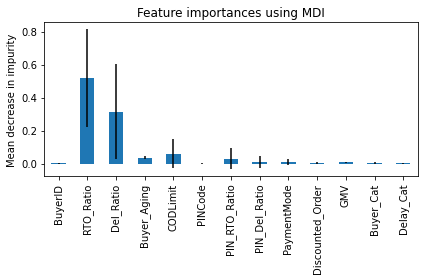

In [106]:
feature_names = [f"{i}" for i in a]

import time
import numpy as np

start_time = time.time()
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [107]:
test_df['predictions_Aug'] = predictions_Aug

In [108]:
test_df.to_csv(r"C:\Users\Bijnis\Downloads\Results.csv")

In [152]:
frames = [test_df,predictions_Aug]

result = pd.merge(frames, on = index)

NameError: name 'index' is not defined

In [165]:
test_df[(test_df['Y'] != test_df['predictions_Aug']) & (test_df['Y'] == 1)].GMV.sum()

4047110.03

In [106]:
# predict
# predictions = rfc.predict(X_test)

# # evaluation metrics
# from sklearn.metrics import classification_report,confusion_matrix

# print(classification_report(y_test,predictions))

# print(confusion_matrix(y_test,predictions))

# print(accuracy_score(y_test,predictions))

# rfc.decision_path(X_train_sm)

In [126]:
# conda install -c anaconda py-xgboost

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



## Package Plan ##

  environment location: /Users/bijnis/opt/anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  anaconda
    libxgboost-1.5.0           |       he9d5cce_1         2.2 MB  anaconda
    py-xgboost-1.5.0           |   py39hecd8cb5_1         164 KB  anaconda
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages wil

In [152]:
import xgboost as xgb?

In [ ]:
import xgboost as xgb

In [153]:
xgb_cl = xgb.XGBClassifier(objective="binary:logistic",learning_rate=0.25,max_depth=7,base_score=0.5)

In [154]:
xgb_cl.fit(X_train_sm, y_train_sm)

/Users/bijnis/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/bijnis/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:35:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [155]:
preds_Aug = xgb_cl.predict(X_test)

In [156]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [157]:
print(classification_report(y_test,preds_Aug))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90    358673
         1.0       0.62      0.62      0.62     94470

    accuracy                           0.84    453143
   macro avg       0.76      0.76      0.76    453143
weighted avg       0.84      0.84      0.84    453143



In [158]:
print(confusion_matrix(y_test,preds_Aug))

[[322730  35943]
 [ 35850  58620]]


In [159]:
xgb_cl

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [160]:
test_data.head()

,BuyerID,RTO_Ratio,Del_Ratio,Buyer_Aging,CODLimit,PINCode,PIN_RTO_Ratio,PIN_Del_Ratio,PaymentMode,Discounted_Order,GMV,Buyer_Cat,Delay_Cat,Y
261900,1490297775,0.10,0.89,25,23000,791111,0.13,0.77,3,0,17709.84,1,0,0.0
156904,1490367602,0.15,0.85,25,23000,211004,0.19,0.69,3,0,3528.00,1,0,0.0
1438252,1490602618,0.12,0.85,0,22000,842001,0.23,0.68,3,0,1260.00,2,0,0.0
1192934,1490698105,0.09,0.91,1,24000,360001,0.16,0.64,3,0,3748.50,2,0,0.0
1030235,1490387004,0.17,0.81,24,69000,600007,0.12,0.78,3,0,8347.50,1,0,0.0


In [164]:
# To save Excel or csv file
test_data['Prdeiction'] = preds_Aug
test_data.to_csv(r"C:\Users\Bijnis\Downloads\Results.csv")

In [166]:
test_data.head()

,BuyerID,RTO_Ratio,Del_Ratio,Buyer_Aging,CODLimit,PINCode,PIN_RTO_Ratio,PIN_Del_Ratio,PaymentMode,Discounted_Order,GMV,Buyer_Cat,Delay_Cat,Y,Prdeiction
261900,1490297775,0.10,0.89,25,23000,791111,0.13,0.77,3,0,17709.84,1,0,0.0,0.0
156904,1490367602,0.15,0.85,25,23000,211004,0.19,0.69,3,0,3528.00,1,0,0.0,0.0
1438252,1490602618,0.12,0.85,0,22000,842001,0.23,0.68,3,0,1260.00,2,0,0.0,0.0
1192934,1490698105,0.09,0.91,1,24000,360001,0.16,0.64,3,0,3748.50,2,0,0.0,0.0
1030235,1490387004,0.17,0.81,24,69000,600007,0.12,0.78,3,0,8347.50,1,0,0.0,0.0


In [124]:
param_grid = {
    "max_depth": [3, 4, 5, 7, 9,12, 15],
    "learning_rate": [0.1, 0.01, 0.05 ,0.3, 0.5, 0.7, 1],
    "gamma": [0, 0.25, 1, 3, 5,7],
    "reg_lambda": [0, 1, 10, 30, 50],
    "scale_pos_weight": [1, 3, 5,7],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Init classifier
xgb_cl2 = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv1 = GridSearchCV(xgb_cl2, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
Grid_Search = grid_cv1.fit(X_train_sm, y_train_sm)

In [ ]:
scores1 = grid_cv1.cv_results_
pd.DataFrame(scores1).head()